# 확대와 축소 (Scaling)

cv2.resize(이미지,(가로,세로), fx, fy, interpolation=보간 방법)
fx,fy는 각 축의 길이의 배수 ex) fx=3 은 x축 길이 3배 (100 -> 300)

- 보간 방법 
> cv2.INTER_NEAREST

새로 만들어진 좌표에서 가장 가까운 원래 픽셀의 값을 그대로 가져옵니다.

> cv2.INTER_LINEAR

주변의 픽셀 4개를 참조하여 거리 비율에 따라 평균값을 계산해 채웁니다.

> cv2.INTER_CUBIC

주변의 픽셀 16개를 참조하여 복잡한 곡선 함수로 계산합니다.

> cv2.INTER_AREA

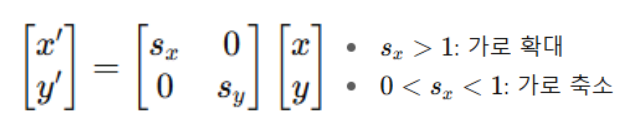

# 회전

- Cv2. getRotationMatrix2D(기준점, 각도, 크기)

- 회전 순서
  1. 이미지의 (0,0)기준으로 각도 만큼 회전을 시킨다
  2. 크기를 줄인다.
  3. 처음 시작했을때 이미지의 기준점을 1,2번 과정 이후 원래 기준점 위치로 옮긴다

이 과정을 통해 나온 행열

[[a_11, a_12, t1],
[a_21, a_22, t2]]

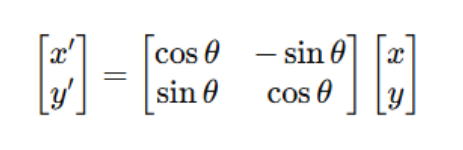

(140.0, 140.0)
[[ 3.061617e-17  5.000000e-01  7.000000e+01]
 [-5.000000e-01  3.061617e-17  2.100000e+02]]


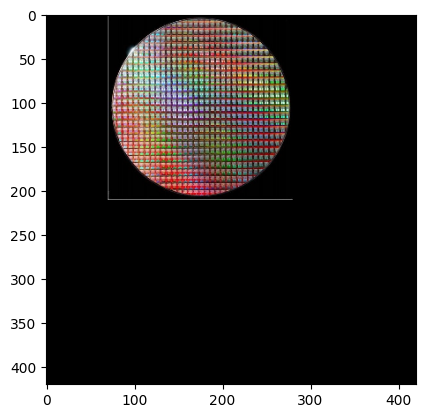

In [20]:
import cv2
import matplotlib.pyplot as plt

image_path = r'C:\ROKEY\Weakly_PDF\03 AI_Application\data\wafer.jpg'
src = cv2.imread(image_path)
height,width,_ = src.shape

center = (width/3,height/3)

angel = 90
scale = 0.5

matrix = cv2.getRotationMatrix2D(center,angel,scale)
print(center)
print(matrix)
dst = cv2.warpAffine(src, matrix,(width,height))
plt.imshow(dst)

# 아핀 변환

- Cv2.getAffineTransform(점1, 점2), 3개의 점으로 변환을 지정함
- 직선은 직선으로 유지, 평행선은 계속 평행하게 유지

- 새 x = a₁₁×x + a₁₂×y + tx
- 새 y = a₂₁×x + a₂₂×y + ty

- a : 회전, 크기
- t : 이동

>cv2.warpAffine(이미지, matrix, (width,height))

- matrix는 앞에서 구한 행열
- (width,height)는 출력 이미지 크기

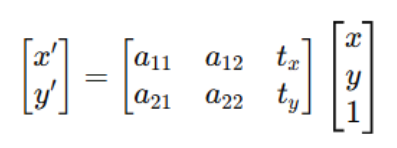

Cv2.getPerspectiveTransform(p1, p2)

p1: 원본 4개 점
p2: 목표 4개 점

- 새 x = (h₁₁×x + h₁₂×y + h₁₃) / (h₃₁×x + h₃₂×y + h₃₃)
- 새 y = (h₂₁×x + h₂₂×y + h₂₃) / (h₃₁×x + h₃₂×y + h₃₃)

- 멀수록 분모가 커지고 나눈 값이 작아짐 >> 작게 보임
- 가까우면 분모가 작아지고 나눈 값이 커짐>> 크게 보임

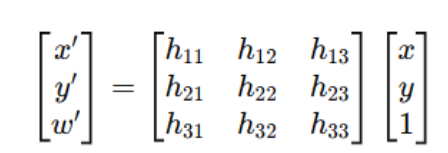

## 이미지 생성

In [ ]:
# 이미지 생성 함수
def create_sample_image():
    # 흰색 배경 이미지 생성
    img = np.ones((400,400,3),dtype=np.uint8) *255

    # 파란색 사각형 그리기(왼쪽 위)
    cv2.rectangle(
        img,
        pt1=(50,50),
        pt2=(150,150),
        color=(255,0,0), # BGR순서로 해가지고 BLUE
        thickness=-1
        )
    
    cv2.circle(
        img,
        center=(300,100),
        radius=50,
        color=(0,255,0), # BGR순서로 해가지고 GREEN
        thickness=-1
        )
    
    #빨간색 삼각형 그리기
    triangle_pts = np.array([[200,350],[150,350],[175,300]], dtype=np.int32)
    cv2.fillPoly(
        img,
        [triangle_pts], # 점들을 리스트로 감싸줘야함
        (0,0,255)
    )

    # 텍스트 추가하기
    cv2.putText(
        img,
        'YOONJAEHYUN',
        (100,250),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        (0,0,0),
        1,
        cv2.LINE_AA
    )

    return img